<a href="https://colab.research.google.com/github/DeryFerd/Machine-Learning-Project/blob/main/Codes/Random_Forest_and_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT LIBRARY

In [101]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# LOAD DATASET

In [102]:
df = pd.read_csv('https://bit.ly/3CJOK3y')
print('Total Row : ', len(df))
df.head()

Total Row :  5000


,ID_Customer,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


# Business and Data Understanding

Business Understanding:
1. is there any correlation between Personal Loan with Income?
2. how many customers accepted Personal Loan?
3. what metrics are used to evaluate the models? and what is the reason?



Dataset Explanation:

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

The target of this dataset is to identify the potential customers who have a higher probability of purchasing the loan.

Dataset Attributes:

1. ID_Customer
2. Age
3. Experience: years of professional experience
4. Income: Annual income of the customer (in thousand dollars)
5. ZIP Code
6. Family: the Family size of the customer
7. CCAvg: Average spending on credit cards per month (in thousand dollars)
8. Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
9. Mortgage: Value of house mortgage if any. (in thousand dollars)
10. Personal Loan: Did this customer accept the personal loan offered in the last campaign? 0 = No, 1 = Yes
11. Securities Account
12. CD Account
13. Online
14. CreditCard

# Data Preparation

In [103]:
columns_to_drop = ['ID_Customer', 'ZIP Code']
data = df.drop(columns_to_drop, axis=1)
data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


we remove ID Customer and ZIP Code because we dont need those columns.

In [104]:
data.dtypes

Age                     int64
Experience              int64
Income                  int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

## Missing Values Handling

In [105]:
data.isnull().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

no missing values in this dataset.

## Anomalies and Outliers Handling

In [106]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

print("Total Row:", len(df))
print("Total Outliers in each Columns:")
print(outliers.sum())

Total Row: 5000
Total Outliers in each Columns:
ID_Customer             0
Age                     0
Experience              0
Income                 96
ZIP Code                1
Family                  0
CCAvg                 324
Education               0
Mortgage              291
Personal Loan         480
Securities Account    522
CD Account            302
Online                  0
CreditCard              0
dtype: int64


we detect some outliers here, but we need to explore before we can handle them.

# Exploratory Data Analysis

<Axes: >

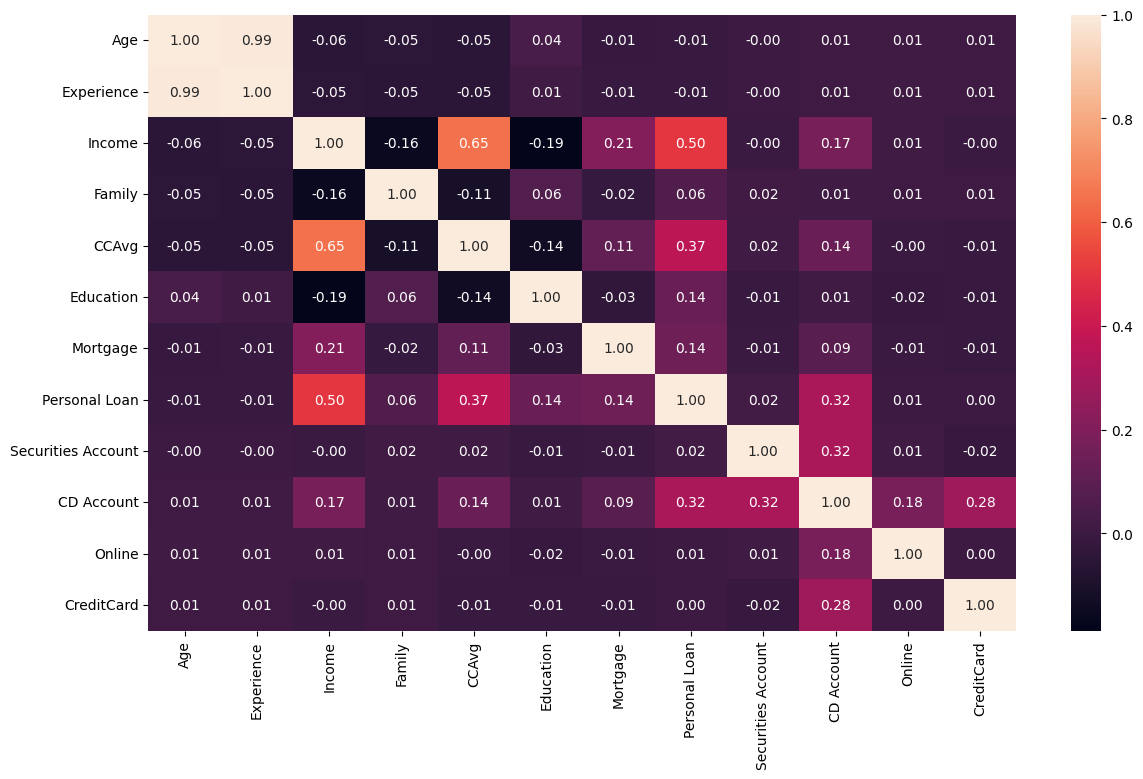

In [107]:
plt.figure(figsize=(14, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f')

we can see that Income has the highest correlation with Personal Loan followed by CCAvg and CDAccount.

## Personal Loan

In [108]:
data['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

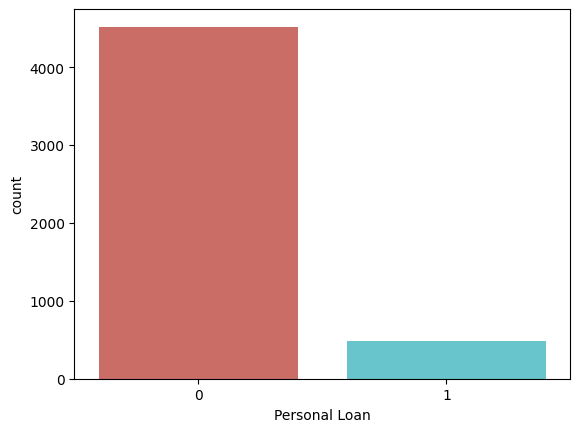

<Figure size 640x480 with 0 Axes>

In [109]:
sns.countplot(x = 'Personal Loan', data=data, palette='hls')
plt.show()
plt.savefig('count plot')

There are significant differences between people who are accepted for a loan and those who are not accepted for a loan.

In [110]:
data.groupby('Personal Loan').mean()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,
0,45.367257,20.132301,66.237389,2.373451,1.729009,1.843584,51.789381,0.102212,0.035841,0.595796,0.293584
1,45.066667,19.843750,144.745833,2.612500,3.905354,2.233333,100.845833,0.125000,0.291667,0.606250,0.297917


we got some insights such as:

1. People who are accepted for a loan have a significantly higher average income. This is due to a substantial difference in the number of people who are accepted for a loan compared to those who are not.

2. People who are accepted for a loan have a higher average credit card usage compared to those who are not.

3. People who are accepted for a loan have a higher average mortgage value compared to those who are not.

## Variables Correlation to Personal Loan

### Age

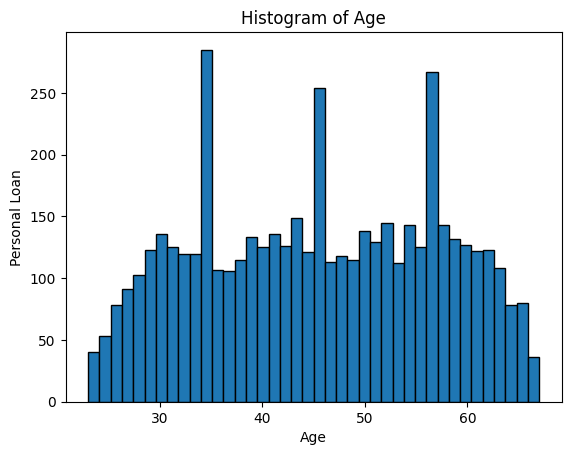

In [111]:
plt.hist(data['Age'], bins=40, edgecolor='black')

plt.xlabel('Age')
plt.ylabel('Personal Loan')
plt.title('Histogram of Age')

plt.show()

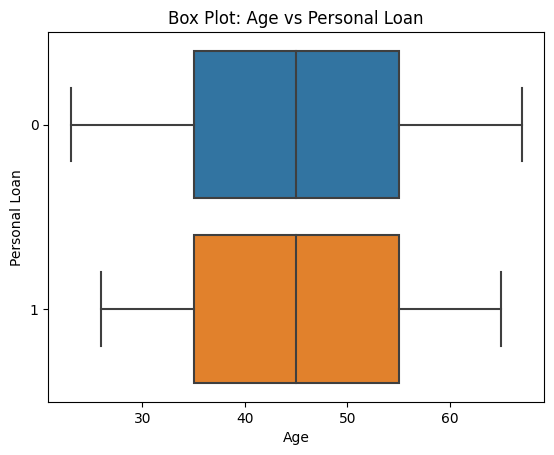

In [112]:
sns.boxplot(y=data['Personal Loan'], x=df['Age'], orient='h')
plt.xlabel('Age')
plt.ylabel('Personal Loan')
plt.title('Box Plot: Age vs Personal Loan')
plt.show()

Although both types of personal loans have a normal distribution, customers who are not accepted the loan have a wider age range than those who accepted the loan.

### Income

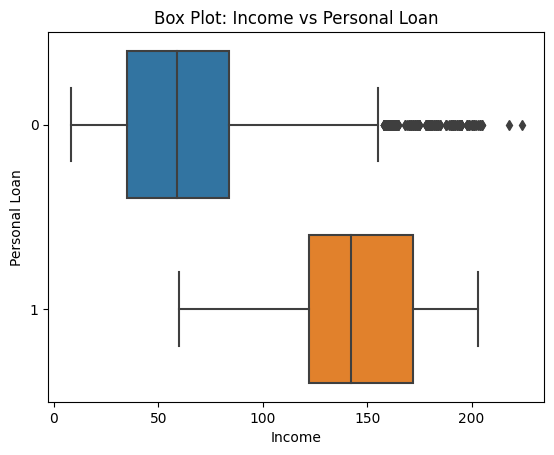

In [113]:
sns.boxplot(y=data['Personal Loan'], x=df['Income'], orient='h')
plt.xlabel('Income')
plt.ylabel('Personal Loan')
plt.title('Box Plot: Income vs Personal Loan')
plt.show()

We can see that customers who accepted the loan have a higher income than those who didn't but there are many customers who didnt accepted the loan but had the same amount of income as who accepted it.

### Experience

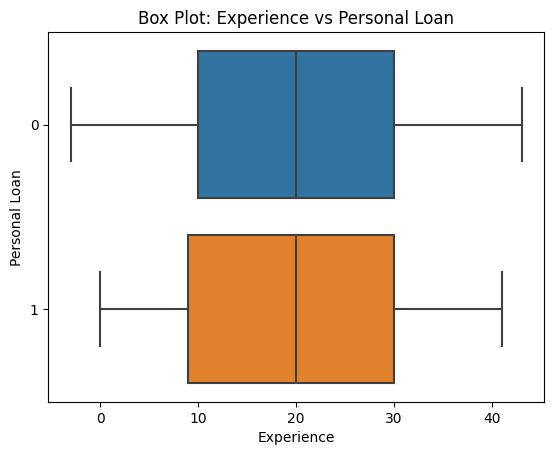

In [114]:
sns.boxplot(y=data['Personal Loan'], x=df['Experience'], orient='h')
plt.xlabel('Experience')
plt.ylabel('Personal Loan')
plt.title('Box Plot: Experience vs Personal Loan')
plt.show()

both types of personal loans have a normal distribution, customers who are not accepted the loan have a wider experience than those who accepted the loan.

### CCAvg

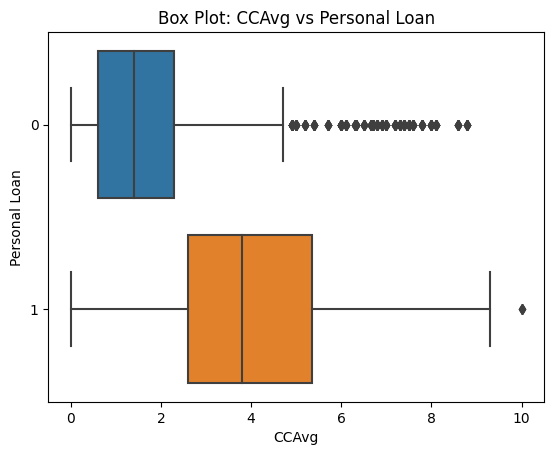

In [115]:
sns.boxplot(y=data['Personal Loan'], x=df['CCAvg'], orient='h')
plt.xlabel('CCAvg')
plt.ylabel('Personal Loan')
plt.title('Box Plot: CCAvg vs Personal Loan')
plt.show()

From the above box plot, we can observe that people who accepted the loan have, on average, higher credit card expenditures compared to those who did not accept. However, it is important to note that there are many outliers among the group of people who did not accept the loan. **We choose not to remove these outliers as they may contain valuable information, and these outliers are still within a reasonable range and not excessive.**

### CD Account

Text(0, 0.5, 'Frequency of Target')

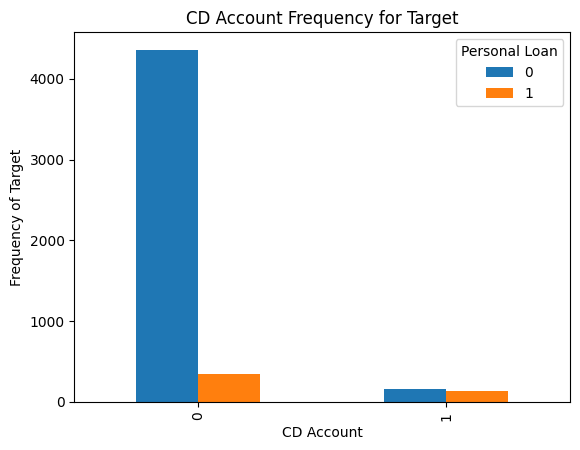

In [116]:
%matplotlib inline
pd.crosstab(df['CD Account'], df['Personal Loan']).plot(kind='bar')
plt.title('CD Account Frequency for Target')
plt.xlabel('CD Account')
plt.ylabel('Frequency of Target')

The majority of people who did not accept the loan do not have a Certificate of Deposit, while among those who accepted the loan, there is also a lower percentage of individuals who did not have a Certificate of Deposit compared to those who do have it.

### Education

Text(0, 0.5, 'Frequency of Target')

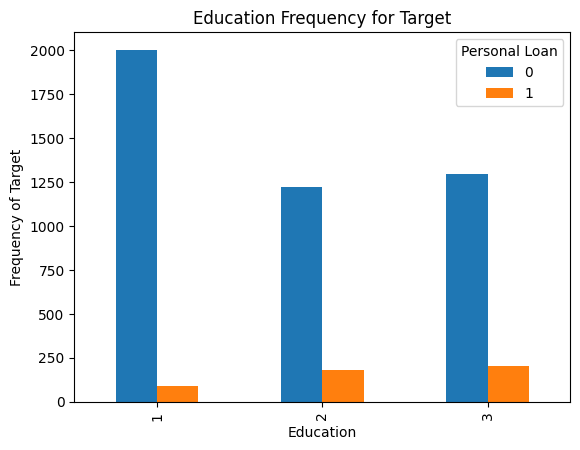

In [117]:
%matplotlib inline
pd.crosstab(df['Education'], df['Personal Loan']).plot(kind='bar')
plt.title('Education Frequency for Target')
plt.xlabel('Education')
plt.ylabel('Frequency of Target')

We observe that people who did not accept the loan have the highest number of individuals with education type 1 (Undergrad) . On the other hand, among those who accepted the loan, there is a slightly higher number of individuals with education types 2 (Graduated) and 3 (Advanced/Professional), but the difference is not significant.

# Split Train-Test Dataset

In [118]:
from sklearn.model_selection import train_test_split
y = df['Personal Loan']
X = df.drop(labels='Personal Loan', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

we split the dataset into 80% for training and 20% for test.

# Modelling

In [119]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

In [120]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

we train the training set with Random Forest and Decision Tree models.

# Evaluation Model

In [121]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix

rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_roc_auc = roc_auc_score(y_test, rf_predictions)
rf_f1_score = f1_score(y_test, rf_predictions)
rf_confusion_matrix = confusion_matrix(y_test, rf_predictions)

print("Random Forest:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("AUC-ROC:", rf_roc_auc)
print("F1 Score:", rf_f1_score)
print("Confusion Matrix:\n", rf_confusion_matrix)


Random Forest:
Accuracy: 0.986
Precision: 0.9523809523809523
Recall: 0.8888888888888888
AUC-ROC: 0.9422466422466422
F1 Score: 0.9195402298850575
Confusion Matrix:
 [[906   4]
 [ 10  80]]


In [122]:
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_precision = precision_score(y_test, dt_predictions)
dt_recall = recall_score(y_test, dt_predictions)
dt_roc_auc = roc_auc_score(y_test, dt_predictions)
dt_f1_score = f1_score(y_test, dt_predictions)
dt_confusion_matrix = confusion_matrix(y_test, dt_predictions)

print("Decision Tree:")
print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("AUC-ROC:", dt_roc_auc)
print("F1 Score:", dt_f1_score)
print("Confusion Matrix:\n", dt_confusion_matrix)


Decision Tree:
Accuracy: 0.973
Precision: 0.8181818181818182
Recall: 0.9
AUC-ROC: 0.94010989010989
F1 Score: 0.8571428571428572
Confusion Matrix:
 [[892  18]
 [  9  81]]


In [123]:
evaluation_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'AUC-ROC', 'F1 Score', 'Confusion Matrix'])

rf_evaluation = pd.DataFrame({
    'Model': 'Random Forest',
    'Accuracy': rf_accuracy,
    'Precision': rf_precision,
    'Recall': rf_recall,
    'AUC-ROC': rf_roc_auc,
    'F1 Score': rf_f1_score,
    'Confusion Matrix': [rf_confusion_matrix]
})

dt_evaluation = pd.DataFrame({
    'Model': 'Decision Tree',
    'Accuracy': dt_accuracy,
    'Precision': dt_precision,
    'Recall': dt_recall,
    'AUC-ROC': dt_roc_auc,
    'F1 Score': dt_f1_score,
    'Confusion Matrix': [dt_confusion_matrix]
})

evaluation_df = pd.concat([evaluation_df, rf_evaluation, dt_evaluation], ignore_index=True)

evaluation_df


,Model,Accuracy,Precision,Recall,AUC-ROC,F1 Score,Confusion Matrix
0,Random Forest,0.986,0.952381,0.888889,0.942247,0.919540,"[[906, 4], [10, 80]]"
1,Decision Tree,0.973,0.818182,0.900000,0.940110,0.857143,"[[892, 18], [9, 81]]"


we have to check our model's accuracy, precision, recall, and AUC-ROC after we trained our models. Since we want to predict how many people who are accepting loans, we use the recall metrics. We got that our best model is Decision Tree with the best recall, 90%.

We have completed our simple Decision Tree and Random Forest project. To enhance the quality of future projects, we can consider the following suggestions:

1. Increase the size of the dataset: Working with a larger dataset can provide more comprehensive and representative insights, leading to more accurate models.

2. Feature engineering: Explore additional features or transformations that can provide more meaningful information for the models. This can involve combining existing features, creating interaction terms, or applying domain-specific knowledge.

3. Hyperparameter tuning: Optimize the hyperparameters of the models to achieve better performance. This can be done through techniques like grid search or random search to find the optimal combination of hyperparameters.

4. Cross-validation: Implement cross-validation techniques to obtain more reliable performance estimates and validate the models' generalization capabilities.